In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

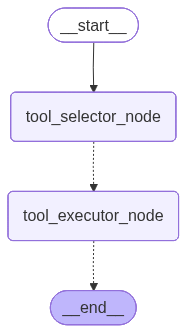

In [3]:
from multimodal_api.agent.graph import graph
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))


In [4]:
import asyncio
from langgraph.runtime import Runtime
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

from multimodal_api.agent.mcp_client import get_mcp_client
from multimodal_api.agent.state import VideoAgentState, Context

In [5]:
config = {"configurable": {"thread_id": "1"}}

async for message_chunk, metadata in graph.astream(
    {"messages": [HumanMessage(content="show the clip with the sad robot")]},
    context={"mcp_client":get_mcp_client()},
    config=config,
    stream_mode="messages",
):
    if message_chunk.content:
        print(message_chunk.content, end=" ", flush=True)
        # print(message_chunk.content, end="|", flush=True)


2025-10-31 16:13:42.755 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:42 - Tool selector invoked. Last user message: show the clip with the sad robot
2025-10-31 16:13:45.644 | DEBUG    | multimodal_api.agent.nodes.tool_selector:tool_selector_node:90 - Tool selector output: 
2025-10-31 16:13:45.644 | SUCCESS  | multimodal_api.agent.nodes.tool_selector:tool_selector_node:91 - Tool chosen: get_video_clip_from_user_query
2025-10-31 16:13:45.644 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:96 - Tool Selector node token usage: (total=750)
2025-10-31 16:13:45.660 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:37 - tool_executor_node invoked. Last user message: 
2025-10-31 16:13:45.661 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:66 - Detected ToolCall → name='get_video_clip_from_user_query', args={"user_query":"show the clip with the sad robot"}


{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"show the clip with the sad robot"}'}
{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"show the clip with the sad robot"}'}


2025-10-31 16:13:56.315 | SUCCESS  | multimodal_api.agent.nodes.tool_executor:tool_executor_node:99 - Tool 'get_video_clip_from_user_query' executed successfully. Result: ././shared_media/2ca06fc3-62f9-495a-b515-b6195d743b5c.mp4


In [7]:
graph_output = await graph.aget_state(config=config)
graph_output

StateSnapshot(values={'messages': [HumanMessage(content='show the clip with the sad robot', additional_kwargs={}, response_metadata={}, id='c821e01d-7105-466d-bd57-00094f4bd9f3'), AIMessage(content='', additional_kwargs={'reasoning_content': 'The user says: "show the clip with the sad robot". They want a clip. So we should use get_video_clip_from_user_query. No image provided. So call that tool.', 'tool_calls': [{'index': 0, 'id': 'fc_d2d5b859-0b6f-4140-9781-029d34a7016d', 'function': {'arguments': '{"user_query":"show the clip with the sad robot"}', 'name': 'get_video_clip_from_user_query'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_80501ff3a1', 'service_tier': 'on_demand', 'model_provider': 'groq'}, id='lc_run--86e9b83a-4f9c-4955-bf6b-f063ac3efc29', tool_calls=[{'name': 'get_video_clip_from_user_query', 'args': {'user_query': 'show the clip with the sad robot'}, 'id': 'fc_d2d5b859-0b6f-4140-9

In [8]:
graph_output.values['messages'][-1].content

'././shared_media/2ca06fc3-62f9-495a-b515-b6195d743b5c.mp4'

In [11]:
async for message_chunk, metadata in graph.astream(
    {"messages": [HumanMessage(content="show me the dinner scene")]},
    context={"mcp_client":get_mcp_client()},
    config=config,
    stream_mode="messages",
):
    if message_chunk.content:
        print(message_chunk.content, end=" ", flush=True)
        # print(message_chunk.content, end="|", flush=True)

2025-10-31 16:21:33.002 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:42 - Tool selector invoked. Last user message: show me the dinner scene
2025-10-31 16:21:36.343 | DEBUG    | multimodal_api.agent.nodes.tool_selector:tool_selector_node:90 - Tool selector output: 
2025-10-31 16:21:36.343 | SUCCESS  | multimodal_api.agent.nodes.tool_selector:tool_selector_node:91 - Tool chosen: get_video_clip_from_user_query
2025-10-31 16:21:36.343 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:96 - Tool Selector node token usage: (total=1934)
2025-10-31 16:21:36.353 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:37 - tool_executor_node invoked. Last user message: 
2025-10-31 16:21:36.354 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:66 - Detected ToolCall → name='get_video_clip_from_user_query', args={"user_query":"show me the dinner scene"}


{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"show me the dinner scene"}'}
{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"show me the dinner scene"}'}


2025-10-31 16:21:43.533 | SUCCESS  | multimodal_api.agent.nodes.tool_executor:tool_executor_node:99 - Tool 'get_video_clip_from_user_query' executed successfully. Result: ././shared_media/620fcf40-0624-49c8-b1db-c7a7f988b882.mp4


In [12]:
async for message_chunk, metadata in graph.astream(
    {"messages": [HumanMessage(content="any talk about science etc? find me the clip from any video")]},
    context={"mcp_client":get_mcp_client()},
    config=config,
    stream_mode="messages",
):
    if message_chunk.content:
        print(message_chunk.content, end=" ", flush=True)
        # print(message_chunk.content, end="|", flush=True)

2025-10-31 16:23:23.390 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:42 - Tool selector invoked. Last user message: any talk about science etc? find me the clip from any video
2025-10-31 16:23:26.659 | DEBUG    | multimodal_api.agent.nodes.tool_selector:tool_selector_node:90 - Tool selector output: 
2025-10-31 16:23:26.667 | SUCCESS  | multimodal_api.agent.nodes.tool_selector:tool_selector_node:91 - Tool chosen: get_video_clip_from_user_query
2025-10-31 16:23:26.667 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:96 - Tool Selector node token usage: (total=2913)
2025-10-31 16:23:26.667 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:37 - tool_executor_node invoked. Last user message: 
2025-10-31 16:23:26.670 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:66 - Detected ToolCall → name='get_video_clip_from_user_query', args={"user_query":"talk about science"}


{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"talk about science"}'}
{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"talk about science"}'}


2025-10-31 16:23:33.245 | SUCCESS  | multimodal_api.agent.nodes.tool_executor:tool_executor_node:99 - Tool 'get_video_clip_from_user_query' executed successfully. Result: ././shared_media/ca6e9359-5393-44b4-beeb-8e96db705721.mp4
